## Creditworthiness.

We will analyze the creditability of bank clients. 

In [1]:
import pandas as pd
df=pd.read_csv('/datasets/credit_scoring_eng.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


We see that there are 21525 entries in the dataset. There are 12 columns. 5 columns are integers, another 5 are strings and the rest are floats. 'days_employed' and 'total_income' have "Null" values.    

### Data preprocessing

### Processing duplicates

In [2]:
df[df.duplicated(keep=False)].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
120,0,NaN,46,secondary education,1,married,0,F,employee,0,NaN,university education
520,0,NaN,35,secondary education,1,civil partnership,1,F,employee,0,NaN,to have a wedding
541,0,NaN,57,secondary education,1,married,0,F,employee,0,NaN,second-hand car purchase
554,0,NaN,60,secondary education,1,married,0,M,employee,0,NaN,buy real estate
680,1,NaN,30,bachelor's degree,0,married,0,F,civil servant,0,NaN,purchase of the house for my family


In [3]:
df.drop_duplicates(keep='first', inplace=True)

In order to find duplicate rows based on all columns I used duplicated() method with argument keep=False (that shows both duplicated and original rows). There are 106 identical rows were found.
Using drop_duplicates() for all duplicated groups keep the first row and drop the rest.
Argument 'inplace=True' makes the changes in data frame itself.
I think that the reasons for the appearance of duplicates in this data is technical issue.

### Processing missing values

In [4]:
df.isnull().sum()

children               0
days_employed       2120
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2120
purpose                0
dtype: int64

Two columns 'days_employed' and 'total_income' have 2120 missing values each column. That is about 10% of the data. These are quantitative variables. We don't have an opportunity to get this information from clients. I decided to fill missing values in 'days_employed' with 'No_info' using fillna() method. Also, I decided to fill Null values with '0' value in 'total_income', but investigate this column. 

In [5]:
df['days_employed'].fillna('No_info',inplace=True)
df['total_income'].fillna('0',inplace=True)

Let's see how many different types of 'income_type' we have in cases where 'total_income' = '0' (missing value)

In [6]:
df[df['total_income']=='0'].groupby('income_type')['total_income'].value_counts()


income_type    total_income
business       0                503
civil servant  0                145
employee       0               1077
entrepreneur   0                  1
retiree        0                394
Name: total_income, dtype: int64

About half of the missing information comes from 'employee'. Another half from 'partner', 'retiree' and 'civil servant'.
Let's convert 'total_income' into numbers in order to make calculations. And find mean and median not including missing values.

In [7]:
df['total_income']=pd.to_numeric(df['total_income'])
df['total_income']=df['total_income'].astype(int)
df[df['total_income']!=0].groupby('income_type')['total_income'].mean()

income_type
business                       32386.298230
civil servant                  27343.226372
employee                       25820.346615
entrepreneur                   79866.000000
paternity / maternity leave     8612.000000
retiree                        21939.891664
student                        15712.000000
unemployed                     21014.000000
Name: total_income, dtype: float64

In [8]:
df[df['total_income']!=0].groupby('income_type')['total_income'].median()

income_type
business                       27577.0
civil servant                  24071.5
employee                       22815.0
entrepreneur                   79866.0
paternity / maternity leave     8612.0
retiree                        18962.0
student                        15712.0
unemployed                     21014.0
Name: total_income, dtype: float64

Let's use median for each type of 'income_type' to replace missing values in 'total_income'. 

In [9]:
df.loc[(df['total_income']==0) & (df['income_type']=='employee'),'total_income']=142594.0
df.loc[(df['total_income']==0) & (df['income_type']=='partner'),'total_income']=172357.0
df.loc[(df['total_income']==0) & (df['income_type']=='retiree'),'total_income']=118514.0
df.loc[(df['total_income']==0) & (df['income_type']=='civil servant'),'total_income']= 150447.5

In [10]:
df.head(50)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.67,42,bachelor's degree,0,married,0,F,employee,0,40620.0,purchase of the house
1,1,-4024.8,36,secondary education,1,married,0,F,employee,0,17932.0,car purchase
2,0,-5623.42,33,Secondary Education,1,married,0,M,employee,0,23341.0,purchase of the house
3,3,-4124.75,32,secondary education,1,married,0,M,employee,0,42820.0,supplementary education
4,0,340266,53,secondary education,1,civil partnership,1,F,retiree,0,25378.0,to have a wedding
5,0,-926.186,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.0,purchase of the house
6,0,-2879.2,43,bachelor's degree,0,married,0,F,business,0,38484.0,housing transactions
7,0,-152.78,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.0,education
8,2,-6929.87,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.0,having a wedding
9,0,-2188.76,41,secondary education,1,married,0,M,employee,0,23108.0,purchase of the house for my family


Another problematic column is 'days_employeed' that has both negative and positive numbers. It was noticed that all working categories (like, 'employee', 'civil servant', 'partner') have negative numbers and retirees have positive numbers. It's not clear what's the reason for this.
Trying to convert the data into years doesn't help. Some retirees have 1000 years of working experience (these are 'outliers').
Probably the reason for such mistake in 'days_employed' column is technical issue. For futher analysis we don't need to use this information, so I decided to leave this column as it is.

### Conclusion

About 10% of the data is missing. The information comes from customers so it's not surprising that not all fields are filled (intentionally or unintentionally). Also thecnical errors could take place.
I decided not just drop all missing values, but to fill some of them with string 'No_info' ('days_employeed' column) and others with median (that was calculated for different categories of 'income_type'). I think it's more accurate to fill missing values using median for each group of income_type and not median of total column.


### Data type replacement

In [11]:
df['total_income']=pd.to_numeric(df['total_income'])
df['total_income']=df['total_income'].astype(int)

### Conclusion

After filling a missing values in column 'total_income' with string '0', we need to convert string values into numbers using to_numeric method (in our case this method will turn our values to float64). Using astype() method we convert float into integer. It is much convinience to work with 'total_income' as integer number.
Converting string values into numbers give us ability to make calculations.

### Lemmatization

In [12]:
import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemma = WordNetLemmatizer()

lemmas_purpose=[]
for row in df['purpose']:
    words=nltk.word_tokenize(row)
    lemmas_purpose.append([wordnet_lemma.lemmatize(w,pos='n') for w in words])
    
df['lemmas_purpose']=lemmas_purpose
df.head(50)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,lemmas_purpose
0,1,-8437.67,42,bachelor's degree,0,married,0,F,employee,0,40620,purchase of the house,"[purchase, of, the, house]"
1,1,-4024.8,36,secondary education,1,married,0,F,employee,0,17932,car purchase,"[car, purchase]"
2,0,-5623.42,33,Secondary Education,1,married,0,M,employee,0,23341,purchase of the house,"[purchase, of, the, house]"
3,3,-4124.75,32,secondary education,1,married,0,M,employee,0,42820,supplementary education,"[supplementary, education]"
4,0,340266,53,secondary education,1,civil partnership,1,F,retiree,0,25378,to have a wedding,"[to, have, a, wedding]"
5,0,-926.186,27,bachelor's degree,0,civil partnership,1,M,business,0,40922,purchase of the house,"[purchase, of, the, house]"
6,0,-2879.2,43,bachelor's degree,0,married,0,F,business,0,38484,housing transactions,"[housing, transaction]"
7,0,-152.78,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731,education,[education]
8,2,-6929.87,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337,having a wedding,"[having, a, wedding]"
9,0,-2188.76,41,secondary education,1,married,0,M,employee,0,23108,purchase of the house for my family,"[purchase, of, the, house, for, my, family]"


### Conclusion

Let's look at 'purpose' column. I divided the text into words. For this purpose I used word_tokenize() function for each row in 'purpose' column. After spliting the words I used lemmatize() method to convert a word to its base form. Thus I created a new column with lemmas for further categorization.   

### Categorizing Data

In [13]:
def categories(row):
    if 'house' in row:
        return 'estate'
    if 'car' in row:
        return 'car'
    if 'wedding' in row:
        return 'wedding'
    if 'education' in row:
        return 'education'
    if 'estate' in row:
        return 'estate'
    if 'property' in row:
        return 'estate'
    
df['category']=df['lemmas_purpose'].apply(categories)
df.head(50)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,lemmas_purpose,category
0,1,-8437.67,42,bachelor's degree,0,married,0,F,employee,0,40620,purchase of the house,"[purchase, of, the, house]",estate
1,1,-4024.8,36,secondary education,1,married,0,F,employee,0,17932,car purchase,"[car, purchase]",car
2,0,-5623.42,33,Secondary Education,1,married,0,M,employee,0,23341,purchase of the house,"[purchase, of, the, house]",estate
3,3,-4124.75,32,secondary education,1,married,0,M,employee,0,42820,supplementary education,"[supplementary, education]",education
4,0,340266,53,secondary education,1,civil partnership,1,F,retiree,0,25378,to have a wedding,"[to, have, a, wedding]",wedding
5,0,-926.186,27,bachelor's degree,0,civil partnership,1,M,business,0,40922,purchase of the house,"[purchase, of, the, house]",estate
6,0,-2879.2,43,bachelor's degree,0,married,0,F,business,0,38484,housing transactions,"[housing, transaction]",None
7,0,-152.78,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731,education,[education],education
8,2,-6929.87,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337,having a wedding,"[having, a, wedding]",wedding
9,0,-2188.76,41,secondary education,1,married,0,M,employee,0,23108,purchase of the house for my family,"[purchase, of, the, house, for, my, family]",estate


In [14]:
df['category'].value_counts()

estate       8909
car          4308
education    3110
wedding      2335
Name: category, dtype: int64

### Conclusion

After lemmatization I divided data in 'lemmas_purpose' into several categories: 'estate','car', 'education', 'wedding'. In my opinion it's correct to join 'estate', 'property', 'house' into one category 'estate'. 

### Lets answer some questions

- Is there a relation between having kids and repaying a loan on time?

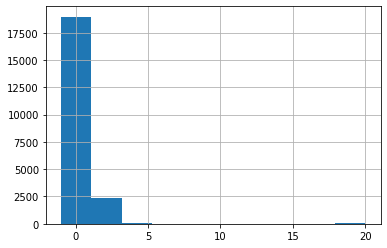

In [15]:
df['children'].hist()

In [16]:
df.groupby('children')['debt'].agg(['count','mean'])

,count,mean
children,,
-1,47,0.021277
0,14107,0.075353
1,4809,0.092327
2,2052,0.094542
3,330,0.081818
4,41,0.097561
5,9,0.000000
20,76,0.105263


There are 3 big groups: 
the largest - customers without children, another two smaller group with 1 or 2 children.
Let's corncern this 3 groups.

In [17]:
df['children_group']=pd.cut(df['children'],[-1,0,1,2])
df.groupby('children_group')['debt'].agg(['count','mean'])

,count,mean
children_group,,
"(-1, 0]",14107,0.075353
"(0, 1]",4809,0.092327
"(1, 2]",2052,0.094542


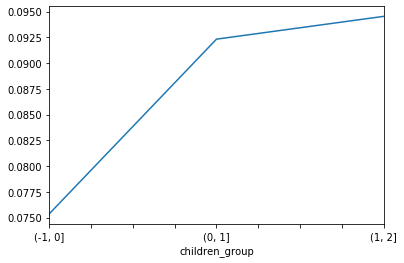

In [18]:
df.groupby('children_group')['debt'].mean().plot();

### Conclusion

The more children customers have, the debt ratio grows.
It makes sense, more children - more expenses.

- Is there a relation between marital status and repaying a loan on time?

In [19]:
df.groupby('family_status')['debt'].agg(['count','mean'])

,count,mean
family_status,,
civil partnership,4163,0.093202
divorced,1195,0.071130
married,12344,0.075421
unmarried,2810,0.097509
widow / widower,959,0.065693


### Conclusion

There is no connection beetwen marital_status and repaying a loan. Both married and divorced persons have almost the same debt ratio. The same situation with civil partnership and unmarried persons. It means having a spouse doesn't influence on debt ratio.

- Is there a relation between income level and repaying a loan on time?

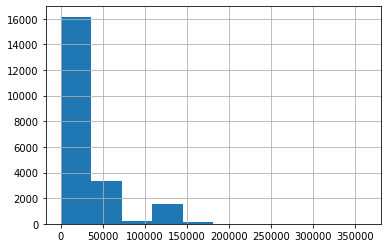

In [20]:
df['total_income'].hist();

In [21]:
df[['total_income','debt']].corr()

,total_income,debt
total_income,1.00000,0.00067
debt,0.00067,1.00000


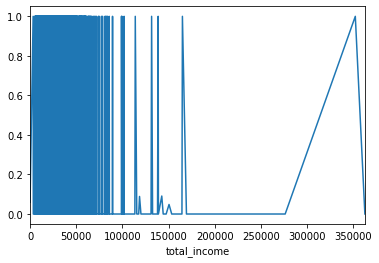

In [22]:
df.groupby('total_income')['debt'].mean().plot();

In [23]:
df['total_income_group']=pd.cut(df['total_income'],[0,100000,300000,600000])

In [24]:
df.groupby('total_income_group')['debt'].agg(['count','mean'])

,count,mean
total_income_group,,
"(0, 100000]",19252,0.081290
"(100000, 300000]",1713,0.084647
"(300000, 600000]",2,0.500000


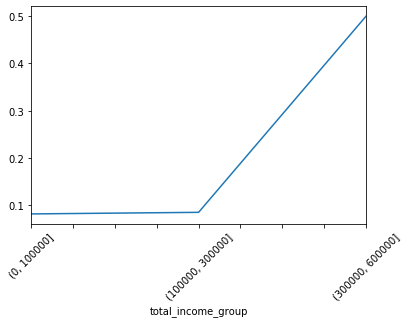

In [25]:
df.groupby('total_income_group')['debt'].mean().plot(rot=45);

### Conclusion

It seems like there is a relation between income level and repaying a loan. I divided total_income into 3 groups: small income level (up to 100,000), medium (100,000-300,0000) and high level (300,000-600,000) and calculated mean for each group. For first two groups debt ratio almost the same, then it drops for third group with high income level. 
Customers with high incomes tend to repay loans on time.

- How do different loan purposes affect on-time repayment of the loan?

In [26]:
df.groupby('category')['debt'].agg(['count','mean'])

,count,mean
category,,
car,4308,0.093547
education,3110,0.092605
estate,8909,0.073297
wedding,2335,0.079657


### Conclusion

Customers that take a loan for purpose to buy real estate/construct property/housing have the smallest ratio debt. Almost the same situation with "wedding loans". About 90% of the customers that took a loan for buing car or to get an education repayed their loan.

### General conclusion

We analysed data with information about 21,500 customers of the bank. The data had some missing values that were replayced with either 'No info' or median values. 53 Duplicate rows  were deleted. Using lemmatization we categorized data and found 4 main purposes for taking a loan.
Analysing such data as: marital status, having kids, total income and loan purposes, we got to conclusion that the 'ideal' borrower is someone who taking a loan for buing real estate or doesn't have kids or has more than 300,000 total income. Marital status of a client doesn't have an impact on repaying a loan. Growing number of children increasing debt ratio. However increasing total income decreases debt ratio. About 93% of the customers that take a loan for buing real estate or to get married repay their loan. In case of car and education loan purpose we have about 90% of repaying loans.